In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from config.path_config import *
from utils.common_function import read_yalm_file
import sys
from pathlib import Path

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv(r"D:\My End to End Projects\mlops_proj_1\artifacts\raw\raw.csv")

In [32]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [34]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [35]:
df.drop(columns=['Booking_ID'], inplace=True)

In [36]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [37]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [38]:
print("Categorical Columns:", cat_cols)
print("Continuous Columns:", num_cols)

Categorical Columns: ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
Continuous Columns: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [40]:
mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
    mappings[col] = {label:code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

In [41]:
print("Label Encodings:")
for col, mapping in mappings.items():
    print(f"{col}: {mapping}")

Label Encodings:
type_of_meal_plan: {'Meal Plan 1': np.int64(0), 'Meal Plan 2': np.int64(1), 'Meal Plan 3': np.int64(2), 'Not Selected': np.int64(3)}
room_type_reserved: {'Room_Type 1': np.int64(0), 'Room_Type 2': np.int64(1), 'Room_Type 3': np.int64(2), 'Room_Type 4': np.int64(3), 'Room_Type 5': np.int64(4), 'Room_Type 6': np.int64(5), 'Room_Type 7': np.int64(6)}
market_segment_type: {'Aviation': np.int64(0), 'Complementary': np.int64(1), 'Corporate': np.int64(2), 'Offline': np.int64(3), 'Online': np.int64(4)}
booking_status: {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}


In [42]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [44]:
X =add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [45]:
vif_data

,feature,VIF
0,const,3.593919e+07
1,no_of_adults,1.293487e+00
2,no_of_children,1.257270e+00
3,no_of_weekend_nights,1.064807e+00
4,no_of_week_nights,1.089508e+00
5,type_of_meal_plan,1.155803e+00
6,required_car_parking_space,1.033166e+00
7,room_type_reserved,1.532264e+00
8,lead_time,1.442987e+00
9,arrival_year,1.300423e+00


In [46]:
skewness = df.skew()
print("Skewness of each feature:", skewness)

Skewness of each feature: no_of_adults                            -0.333295
no_of_children                           4.710350
no_of_weekend_nights                     0.737616
no_of_week_nights                        1.599350
type_of_meal_plan                        1.801398
required_car_parking_space               5.413643
room_type_reserved                       1.729018
lead_time                                1.292492
arrival_year                            -1.669695
arrival_month                           -0.348229
arrival_date                             0.028809
market_segment_type                     -1.684871
repeated_guest                           6.002888
no_of_previous_cancellations            25.199876
no_of_previous_bookings_not_canceled    19.250191
avg_price_per_room                       0.667133
no_of_special_requests                   1.145081
booking_status                          -0.734507
dtype: float64


In [47]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [48]:
df.skew()

no_of_adults                            -0.333295
no_of_children                           4.710350
no_of_weekend_nights                     0.737616
no_of_week_nights                        1.599350
type_of_meal_plan                        1.801398
required_car_parking_space               5.413643
room_type_reserved                       1.729018
lead_time                                1.292492
arrival_year                            -1.669695
arrival_month                           -0.348229
arrival_date                             0.028809
market_segment_type                     -1.684871
repeated_guest                           6.002888
no_of_previous_cancellations            14.568081
no_of_previous_bookings_not_canceled     8.921569
avg_price_per_room                       0.667133
no_of_special_requests                   1.145081
booking_status                          -0.734507
dtype: float64

In [49]:
df['booking_status'].value_counts()

booking_status
1    24390
0    11885
Name: count, dtype: int64

# Upsampling

In [50]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [52]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [53]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [54]:
X_res, y_res = smote.fit_resample(X, y)

In [55]:
print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", X_res.shape, y_res.shape)

Original dataset shape: (36275, 17) (36275,)
Resampled dataset shape: (48780, 17) (48780,)


In [57]:
df.shape

(36275, 18)

In [59]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df['booking_status'] = y_res

In [60]:
balanced_df.shape

(48780, 18)

In [62]:
df = balanced_df.copy()
df.head() 

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0.0,0,224,2017,10,2,3,0.0,0.0,0.0,65.00,0,1
1,2,0,2,3,3,0.0,0,5,2018,11,6,4,0.0,0.0,0.0,106.68,1,1
2,1,0,2,1,0,0.0,0,1,2018,2,28,4,0.0,0.0,0.0,60.00,0,0
3,2,0,0,2,0,0.0,0,211,2018,5,20,4,0.0,0.0,0.0,100.00,0,0
4,2,0,1,1,3,0.0,0,48,2018,4,11,4,0.0,0.0,0.0,94.50,0,0


# Feature Selection

In [63]:
len(df.columns)

18

In [64]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop(columns='booking_status')
y = df['booking_status']
model = RandomForestClassifier(random_state=42)

In [65]:
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [72]:
feature_importances = model.feature_importances_

In [73]:
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [75]:
top_features_importance_df =feature_importances_df.sort_values(by='Importance', ascending=False)

In [77]:
len(df.columns)

18

In [78]:
top_10_features = top_features_importance_df['Feature'].head(10).values
top_10_df = df[top_10_features.tolist() + ['booking_status']]

In [81]:
len(top_10_df.columns)

11

In [82]:
df = top_10_df.copy()

# Model Selection

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

In [86]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVC': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [89]:
metrics = {
    'model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

In [90]:
for model_name, classifiers in classifiers.items():
    classifiers.fit(X_train, y_train)
    y_pred = classifiers.predict(X_test)
    
    metrics['model'].append(model_name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1 Score'].append(f1_score(y_test, y_pred))

[LightGBM] [Info] Number of positive: 19518, number of negative: 19506
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.240018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 39024, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500154 -> initscore=0.000615
[LightGBM] [Info] Start training from score 0.000615


In [91]:
metrics_df = pd.DataFrame(metrics)

In [93]:
metrics_df.sort_values(by='F1 Score', ascending=False)

,model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.918102,0.910171,0.927545,0.918776
3,XGBoost,0.896064,0.885800,0.909072,0.897285
4,LightGBM,0.884174,0.867728,0.906199,0.886546
7,Decision Tree,0.885199,0.892962,0.875000,0.883890
1,Gradient Boosting,0.835691,0.830135,0.843596,0.836812
8,KNN,0.830361,0.856889,0.792693,0.823542
5,Logistic Regression,0.788950,0.783855,0.797209,0.790475
2,AdaBoost,0.776855,0.763132,0.802135,0.782148
9,Naive Bayes,0.755740,0.772260,0.724548,0.747644
6,SVC,0.686859,0.654376,0.790435,0.715999


# Train Our RF Model

In [101]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [102]:
X= df.drop(columns='booking_status')
y = df['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
rf = RandomForestClassifier(random_state=42)

In [104]:
params = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

In [105]:
random_search =RandomizedSearchCV(estimator=rf, param_distributions=params, n_iter=5, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='accuracy')

In [107]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000210C5EEB590>,
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000210C61D2390>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000210C61D34D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000210C429D9D0>},
                   random_state=42, scoring='accuracy', verbose=2)

In [108]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 87}

In [109]:
rf_model = random_search.best_estimator_

In [110]:
y_pred = rf_model.predict(X_test)

In [122]:
accuracy_df = pd.DataFrame({
    'Accuracy': [accuracy_score(y_test, y_pred)],
    'Precision': [precision_score(y_test, y_pred)],
    'Recall': [recall_score(y_test, y_pred)],
    'F1 Score': [f1_score(y_test, y_pred)]
})
print(accuracy_df)

print("\n ====== Classification Report =======\n")

print('classification_report:\n', classification_report(y_test, y_pred))

   Accuracy  Precision    Recall  F1 Score
0  0.871976   0.850998  0.901478  0.875511

 ====== Classification Report =======

classification_report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      4884
           1       0.85      0.90      0.88      4872

    accuracy                           0.87      9756
   macro avg       0.87      0.87      0.87      9756
weighted avg       0.87      0.87      0.87      9756



Text(45.722222222222214, 0.5, 'Actual')

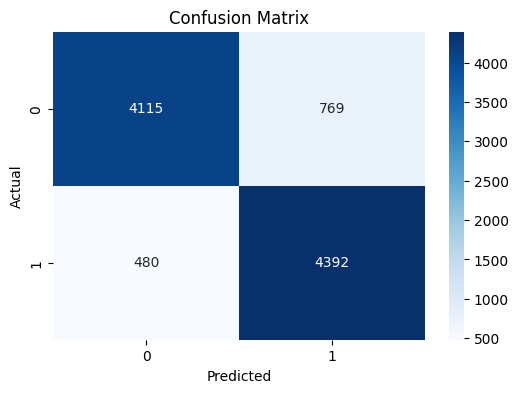

In [125]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the Model

In [133]:
import joblib
import os


# Create directory if it doesn't exist
model_dir = r'D:\My End to End Projects\mlops_proj_1\artifacts\model'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

# Define full path including the file name
model_path = os.path.join(model_dir, 'rf_model.pkl')

# Save the model
joblib.dump(rf_model, model_path)

['D:\\My End to End Projects\\mlops_proj_1\\artifacts\\model\\rf_model.pkl']

In [135]:
X_train[0:1]

,lead_time,avg_price_per_room,no_of_special_requests,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults
19174,113,100.0,0,5,31,2,3,0,2018,1


In [137]:
new_data = np.array(X_train[0:1].copy())

In [138]:
new_data

array([[1.130e+02, 1.000e+02, 0.000e+00, 5.000e+00, 3.100e+01, 2.000e+00,
        3.000e+00, 0.000e+00, 2.018e+03, 1.000e+00]])

In [139]:
load_model = joblib.load(model_path)

In [140]:
load_model.predict(new_data)

array([0])